# Portfolio Optimization using GRU

In [2]:
from utils import load_data
from models import gru_model
from PortfolioEnvironment import PortfolioEnvironment
from DQNAgent import DQNAgent

import numpy as np

In [3]:
df = load_data()
df.head().T

,0,1,2,3,4
close,256.13,258.04,258.11,258.89,261.87
close2,45.82,45.85,45.13,44.90,45.13
close3,525.80,532.75,530.28,533.88,538.33
close4,267.15,267.88,268.48,272.25,278.12
close5,71.36,72.73,72.71,74.20,74.33


In [4]:
# Training the DQN agent
env = PortfolioEnvironment(df)
state_size = len(env.reset())  # Number of features in the state
action_size = 3  # Number of actions (Buy, Hold, Sell)
agent = DQNAgent(state_size, action_size, gru_model)

num_episodes = 100
batch_size = 32

2024-11-22 07:40:14.753377: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
# Lists to store episode rewards
episode_rewards = []

for episode in range(num_episodes):
    state = env.reset()
    state = np.reshape(state.values, [1, state_size])
    total_reward = 0

    for step in range(env.max_steps):
        action = agent.act(state)
        next_state, reward, done = env.step(action)
        next_state = np.reshape(next_state.values, [1, state_size])
        agent.remember(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward

        if done:
            break

    agent.replay(batch_size)
    agent.target_train()

    # Decay exploration rate
    if agent.epsilon > agent.epsilon_min:
        agent.epsilon *= agent.epsilon_decay

    episode_rewards.append(total_reward)
    print(f"Episode: {episode + 1}, Total Reward: {total_reward}")


Episode: 1, Total Reward: 14.615099999999998
Episode: 2, Total Reward: -23.059700000000003
Episode: 3, Total Reward: 47.3007
Episode: 4, Total Reward: 6.783999999999998
Episode: 5, Total Reward: -36.67350000000002
Episode: 6, Total Reward: 17.78070000000001
Episode: 7, Total Reward: -56.06079999999999
Episode: 8, Total Reward: 64.0199
Episode: 9, Total Reward: 1.8060000000000023
Episode: 10, Total Reward: -32.7795
Episode: 11, Total Reward: 49.91979999999998
Episode: 12, Total Reward: -42.82710000000001
Episode: 13, Total Reward: 50.568000000000026
Episode: 14, Total Reward: 97.48789999999998
Episode: 15, Total Reward: 2.514699999999996
Episode: 16, Total Reward: 39.99810000000001
Episode: 17, Total Reward: 66.9752
Episode: 18, Total Reward: 4.47369999999999
Episode: 19, Total Reward: 51.9993
Episode: 20, Total Reward: 88.64330000000001
Episode: 21, Total Reward: 70.23080000000002
Episode: 22, Total Reward: 29.888999999999996
Episode: 23, Total Reward: 24.812300000000008
Episode: 24, T

In [6]:
import matplotlib.pyplot as plt

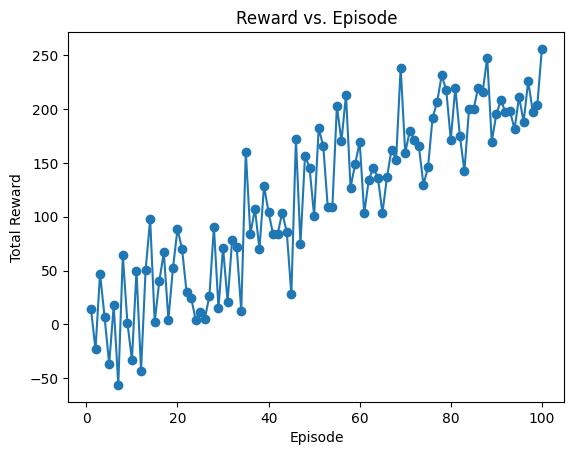

In [11]:
# Plotting the rewards vs. episode graph
plt.plot(range(1, num_episodes + 1), episode_rewards, marker='o')
plt.title('Reward vs. Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()


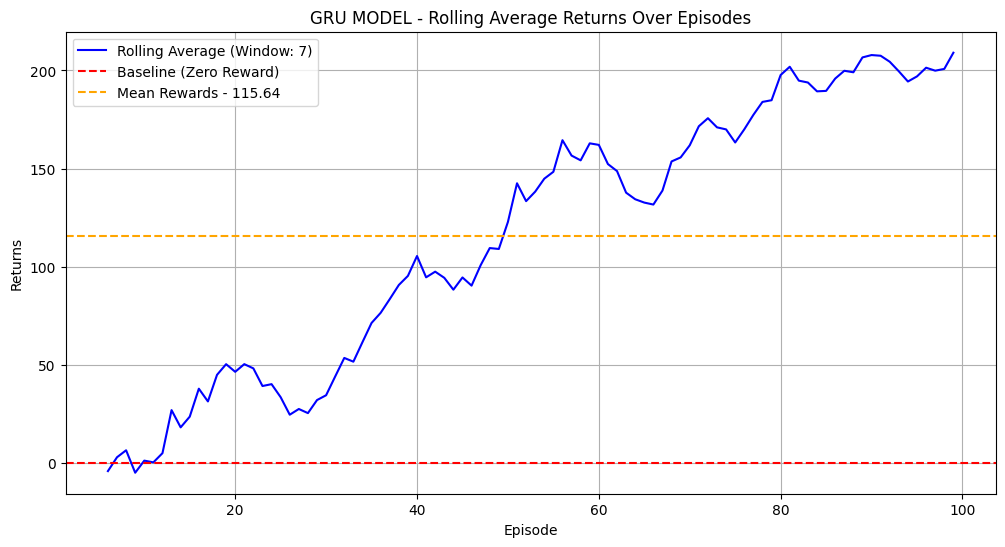

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert episode_rewards to Pandas Series
episode_rewards = pd.Series(episode_rewards)

# Define rolling window size
window_size = 7
rolling_avg_returns = episode_rewards.rolling(window=window_size).mean()

# Plot rolling average returns
plt.figure(figsize=(12, 6))
plt.plot(rolling_avg_returns, label=f'Rolling Average (Window: {window_size})', color='blue')
plt.axhline(0, color='red', linestyle='--', label='Baseline (Zero Reward)')
plt.axhline(episode_rewards.mean(), color='orange', linestyle='--', label=f'Mean Rewards - {episode_rewards.mean():.2f}')
plt.title('GRU MODEL - Rolling Average Returns Over Episodes')
plt.xlabel('Episode')
plt.ylabel('Returns')
plt.legend()
plt.grid()
plt.show()


In [12]:
episode_rewards.mean()

115.63541800000002

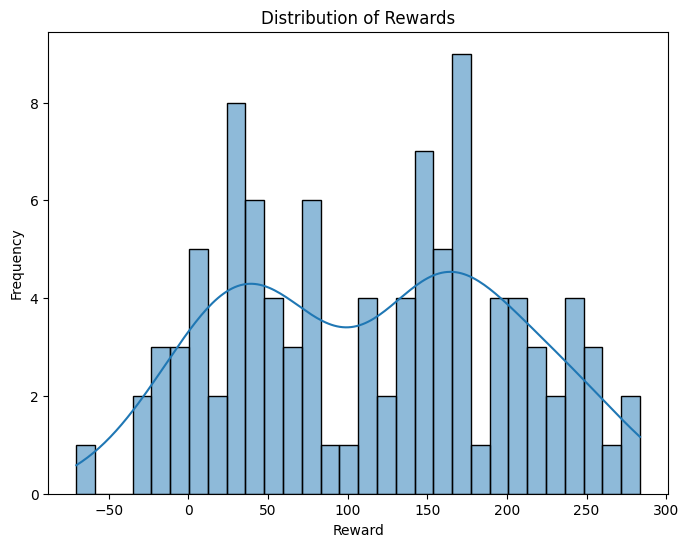

In [8]:
import seaborn as sns

# Plot reward distribution
plt.figure(figsize=(8, 6))
sns.histplot(episode_rewards, kde=True, bins=30)
plt.xlabel('Reward')
plt.ylabel('Frequency')
plt.title('Distribution of Rewards')
plt.show()

# Plotting Model with Sample Actions and Sample Inputs

In [9]:
from tensorflow.keras.utils import plot_model

In [10]:
input_shape = 248  # Example input shape (reduced)
num_actions = 5  # Example number of actions

# Build the model
model = gru_model(input_shape, num_actions)

img = plot_model(model)

img

You must install pydot (`pip install pydot`) for `plot_model` to work.


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
